## Image Slicing for Slider Puzzle
I have a 1080 x 1080 image that I want to slice into 9 pieces for a slider puzzle. I want to save the slices as separate images in a folder called "slices". The slices will be named as "slice_1.png", "slice_2.png", and so on. The slices folder will be saved in the same directory as the original image.

In [68]:
import os


# Define the root folder and the destination folder
ROOT_DIR = ""
SRC_DIR = os.path.join(ROOT_DIR, "req_images")
DEST_DIR = os.path.join(SRC_DIR, "slices")
os.makedirs(DEST_DIR, exist_ok=True) # create destination dir if doesn't exist

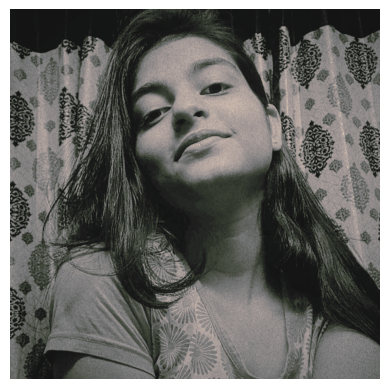

In [69]:
import cv2
from matplotlib import axis
import matplotlib.pyplot as plt
%matplotlib inline

# Read image
imgPath = os.path.join(SRC_DIR, 'Slider_Puzzle_Sexy_Pic_Edited.png')
img = cv2.imread(imgPath)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot image
plt.imshow(imgRGB)
plt.axis("off")
plt.show()

In [70]:
# Print img
img

array([[[ 22,  23,  21],
        [ 22,  23,  21],
        [ 22,  23,  21],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[ 22,  23,  21],
        [ 22,  23,  21],
        [ 22,  23,  21],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[ 22,  23,  21],
        [ 22,  23,  21],
        [ 22,  23,  21],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       ...,

       [[ 97, 102, 100],
        [101, 106, 104],
        [105, 108, 106],
        ...,
        [ 78,  83,  81],
        [ 92,  99,  96],
        [110, 117, 112]],

       [[ 97, 102, 100],
        [101, 106, 104],
        [105, 108, 106],
        ...,
        [ 82,  87,  85],
        [ 91,  96,  94],
        [102, 107, 105]],

       [[ 95, 100,  98],
        [101, 104, 102],
        [104, 107, 105],
        ...,
        [ 88,  93,  91],
        [ 89,  94,  93],
        [ 90,  95,  94]]

In [71]:
# Determine the shape of the image read - the 3rd value is number of channels
img.shape

(1080, 1080, 3)

In [72]:
def sliceImage(imgPath, sliceSize):
    """
    Slice the image into smaller images of size sliceSize x sliceSize and
    return the list of slices.
    """

    # Read the image
    img = cv2.imread(imgPath)

    slices = []

    for row in range(0, img.shape[0], sliceSize):
        for col in range(0, img.shape[1], sliceSize):
            # Slice the image
            slicedImg = img[row: row + sliceSize, col: col + sliceSize]
            slices.append(slicedImg)
        # end for
    # end for
    
    return slices
# end function sliceImage()

In [73]:
# Function call for the image we have with slice size being 1080 // 3 = 360
imageSlices = sliceImage(imgPath, 360)

In [74]:
imageSlices

[array([[[22, 23, 21],
         [22, 23, 21],
         [22, 23, 21],
         ...,
         [24, 24, 24],
         [24, 24, 24],
         [25, 25, 25]],
 
        [[22, 23, 21],
         [22, 23, 21],
         [22, 23, 21],
         ...,
         [28, 28, 28],
         [29, 29, 29],
         [30, 30, 30]],
 
        [[22, 23, 21],
         [22, 23, 21],
         [22, 23, 21],
         ...,
         [29, 29, 29],
         [31, 31, 31],
         [32, 32, 32]],
 
        ...,
 
        [[80, 89, 86],
         [71, 80, 77],
         [57, 68, 65],
         ...,
         [21, 21, 21],
         [20, 20, 20],
         [20, 20, 20]],
 
        [[72, 83, 80],
         [65, 76, 73],
         [59, 68, 65],
         ...,
         [21, 21, 21],
         [20, 20, 20],
         [20, 20, 20]],
 
        [[89, 98, 95],
         [83, 92, 89],
         [80, 87, 84],
         ...,
         [21, 21, 21],
         [20, 20, 20],
         [20, 20, 20]]], dtype=uint8),
 array([[[ 24,  24,  24],
         [ 24,  

In [75]:
len(imageSlices)

9

In [76]:
imageSlices[0].shape

(360, 360, 3)

In [77]:
# Save the slices.
for index, imageSlice in enumerate(imageSlices, 1):
    destPath = os.path.join(DEST_DIR, f"slice_{index}.png")
    cv2.imwrite(destPath, imageSlice)
    print(f"slice_{index}.png saved! in {DEST_DIR}")
# end for

slice_1.png saved! in req_images\slices
slice_2.png saved! in req_images\slices
slice_3.png saved! in req_images\slices
slice_4.png saved! in req_images\slices
slice_5.png saved! in req_images\slices
slice_6.png saved! in req_images\slices
slice_7.png saved! in req_images\slices
slice_8.png saved! in req_images\slices
slice_9.png saved! in req_images\slices


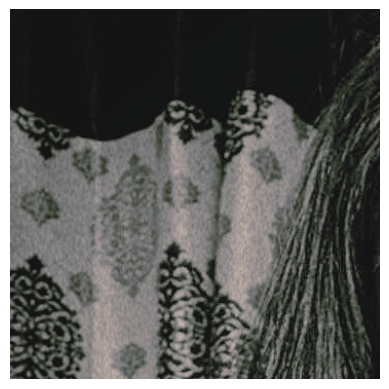

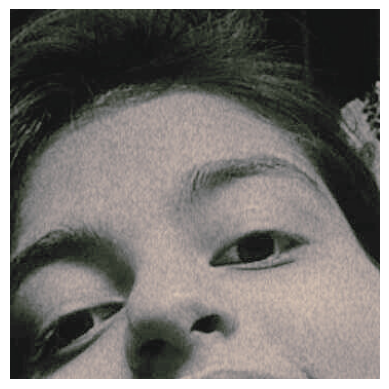

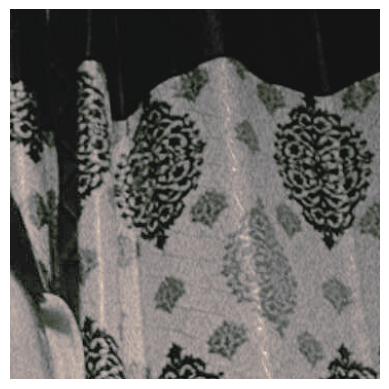

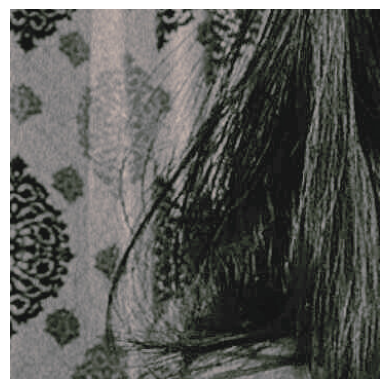

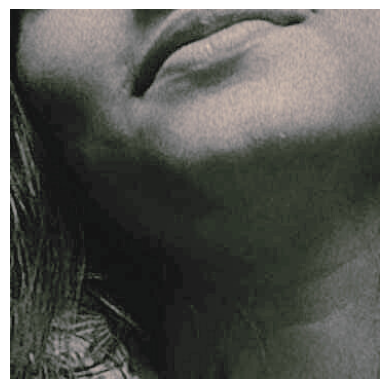

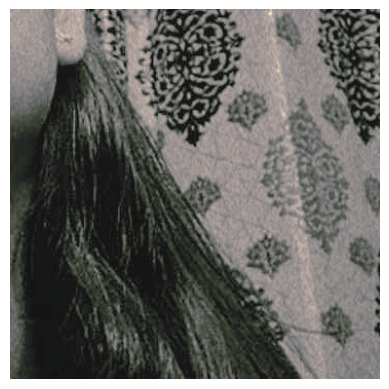

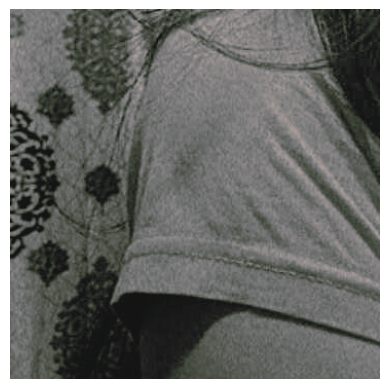

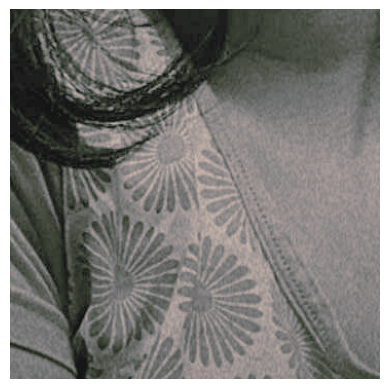

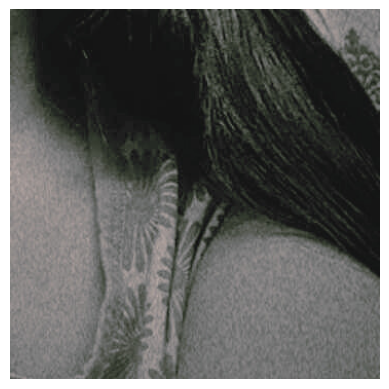

In [78]:
# Plot all slices seperately
allFiles = [f for f in os.listdir(DEST_DIR) if f.endswith('.png')]
for file in allFiles:
    slicePath = os.path.join(DEST_DIR, file)
    img = cv2.imread(slicePath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGB)
    plt.axis("off")
    plt.show()
# end for

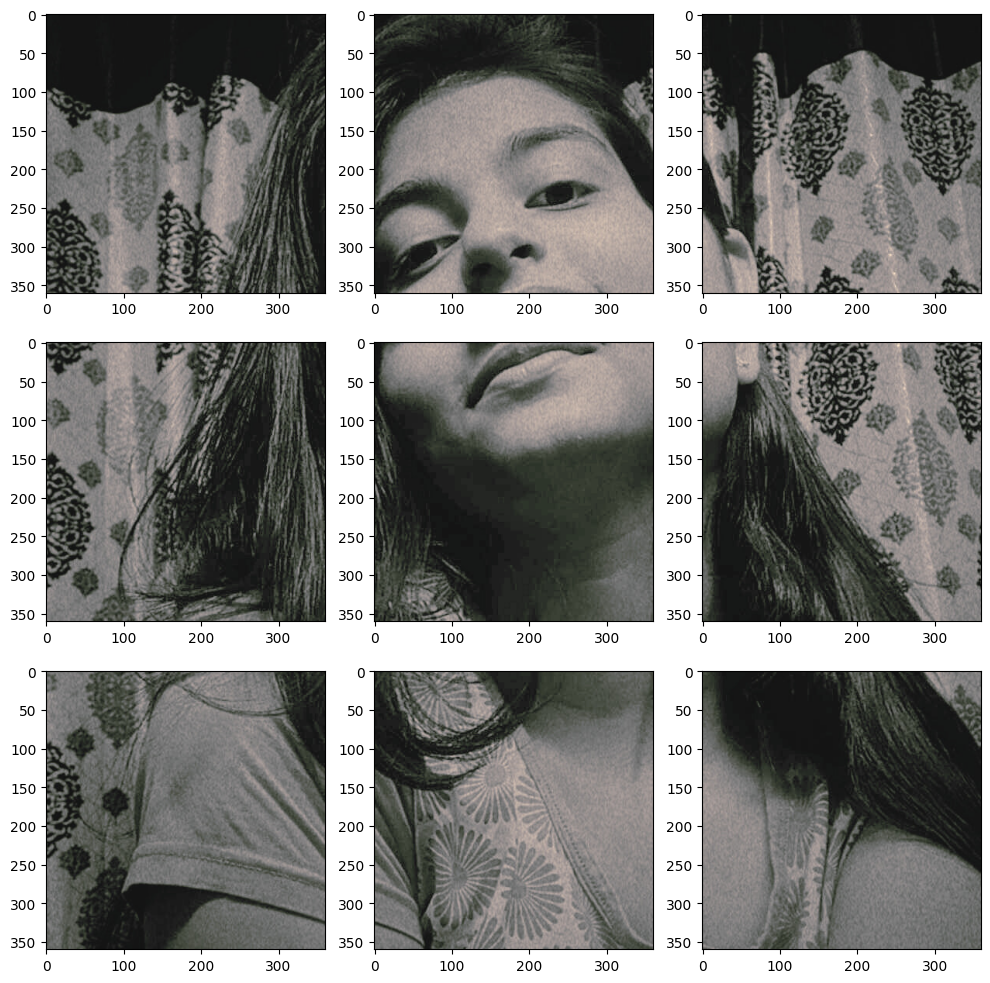

In [79]:
# Plot all slices in a grid
# Number of rows and columns
nRows = 3
nCols = 3
figSize = (10, 10)  # Adjust the size based on your preference

# Get all the files
allFiles = [f for f in os.listdir(DEST_DIR) if f.endswith('.png')]

# Create a figure and axes
fig, axes = plt.subplots(nRows, nCols, figsize=figSize)

for i, file in enumerate(allFiles):
    row = i // nCols
    col = i % nCols

    slicePath = os.path.join(DEST_DIR, file)
    img = cv2.imread(slicePath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[row, col].imshow(imgRGB)
# end for

plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()

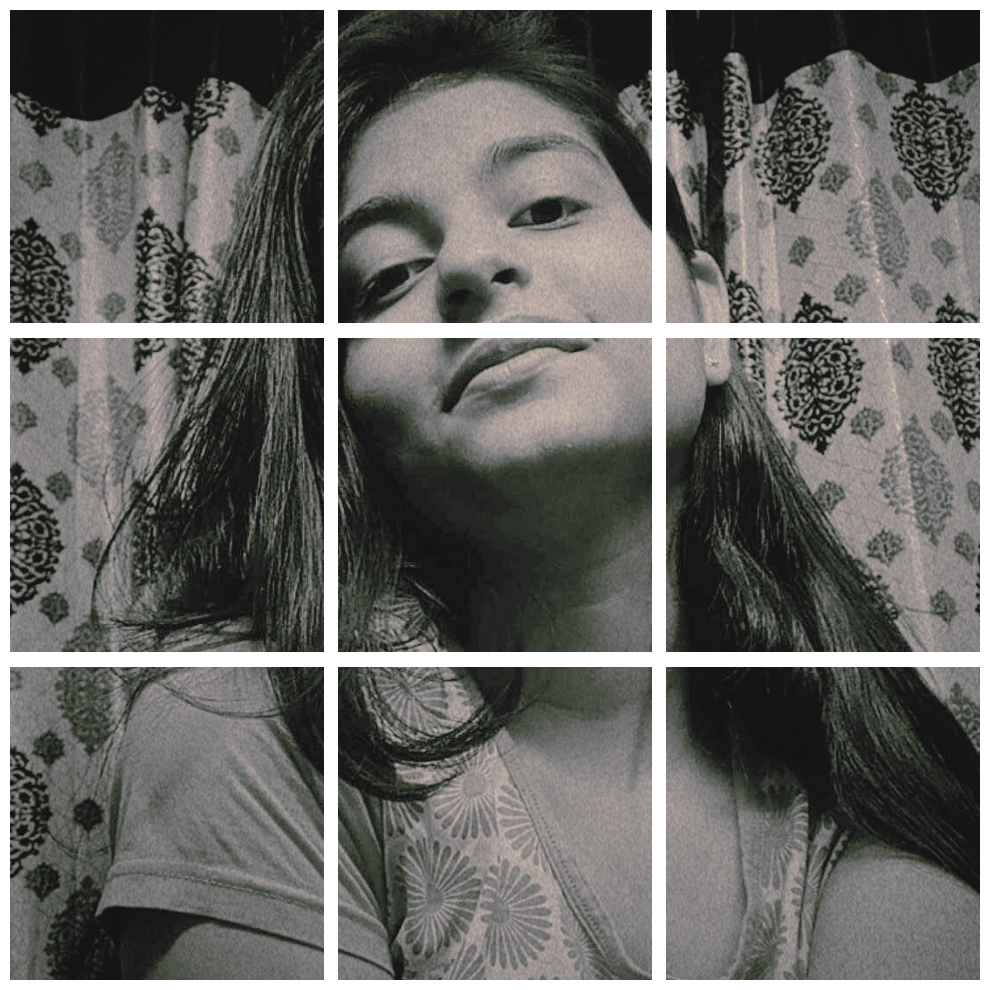

In [80]:
# Plot all slices in a grid
# Number of rows and columns
nRows = 3
nCols = 3
figSize = (10, 10)  # Adjust the size based on your preference

# Get all the files
allFiles = [f for f in os.listdir(DEST_DIR) if f.endswith('.png')]

# Create a figure and axes
fig, axes = plt.subplots(nRows, nCols, figsize=figSize)

for i, file in enumerate(allFiles):
    row = i // nCols
    col = i % nCols

    slicePath = os.path.join(DEST_DIR, file)
    img = cv2.imread(slicePath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[row, col].imshow(imgRGB)
    axes[row, col].axis("off")
# end for

plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()